<a href="https://colab.research.google.com/github/KrishnaMoorthy47/Projects/blob/main/HomeLoanApproval_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**:

The Home Loan Approval project aims to build a machine learning model to predict whether a loan application for a home purchase will be approved or not.


By analyzing the historical data of loan applications, we can identify the key factors that influence loan approval and build different models to predict the outcome of future loan applications.

## **Dataset**:

The dataset used in this project contains information about loan applicants and their loan approval status. It has 614 observations and 13 features:



*   Loan ID

*   Gender

*   Married

*   Dependents

*   Education

*   Self Employed

*   Applicant Income

*   Co-Applicant Income

*   Loan Amount

*   Loan Amount Term

*   Credit History

*  Property Area

*   Loan Status




## **Objectives**:

*  The Main Objective of this project is to develop a predictive model that can accurately predict the likelihood of loan approval for loan applicants.

* To achieve this, we will perform data cleaning, feature engineering, and model
selection and evaluation techniques.


## **Importing Libraries**

We will be using the following libraries in this project:


*   **Pandas**: for data manipulation and analysis

*   **Numpy**: for numerical computing

*   **Scikit-learn**: for machine learning algorithms

*   **Matplotlib** and **seaborn**: for data visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Reading the Data**

In [ ]:
df = pd.read_csv('/content/loan_sanction_train.csv')

test = pd.read_csv('/content/loan_sanction_test.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df = df.drop('Loan_ID',axis =1)

In [ ]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [ ]:
print(df.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [ ]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
df.Married = df.Married.fillna('Yes')

In [ ]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
df.Dependents = df.Dependents.fillna('0')

In [ ]:
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
df.Self_Employed = df.Self_Employed.fillna('No')

In [ ]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())

In [ ]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(360.0)

In [ ]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
df.Credit_History = df.Credit_History.fillna(1.0)

In [ ]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
len(df)

614

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


## **Exploratory Data Analysis**
Before we build our classification model, let's take a closer look at the dataset and try to gain some insights from the data.

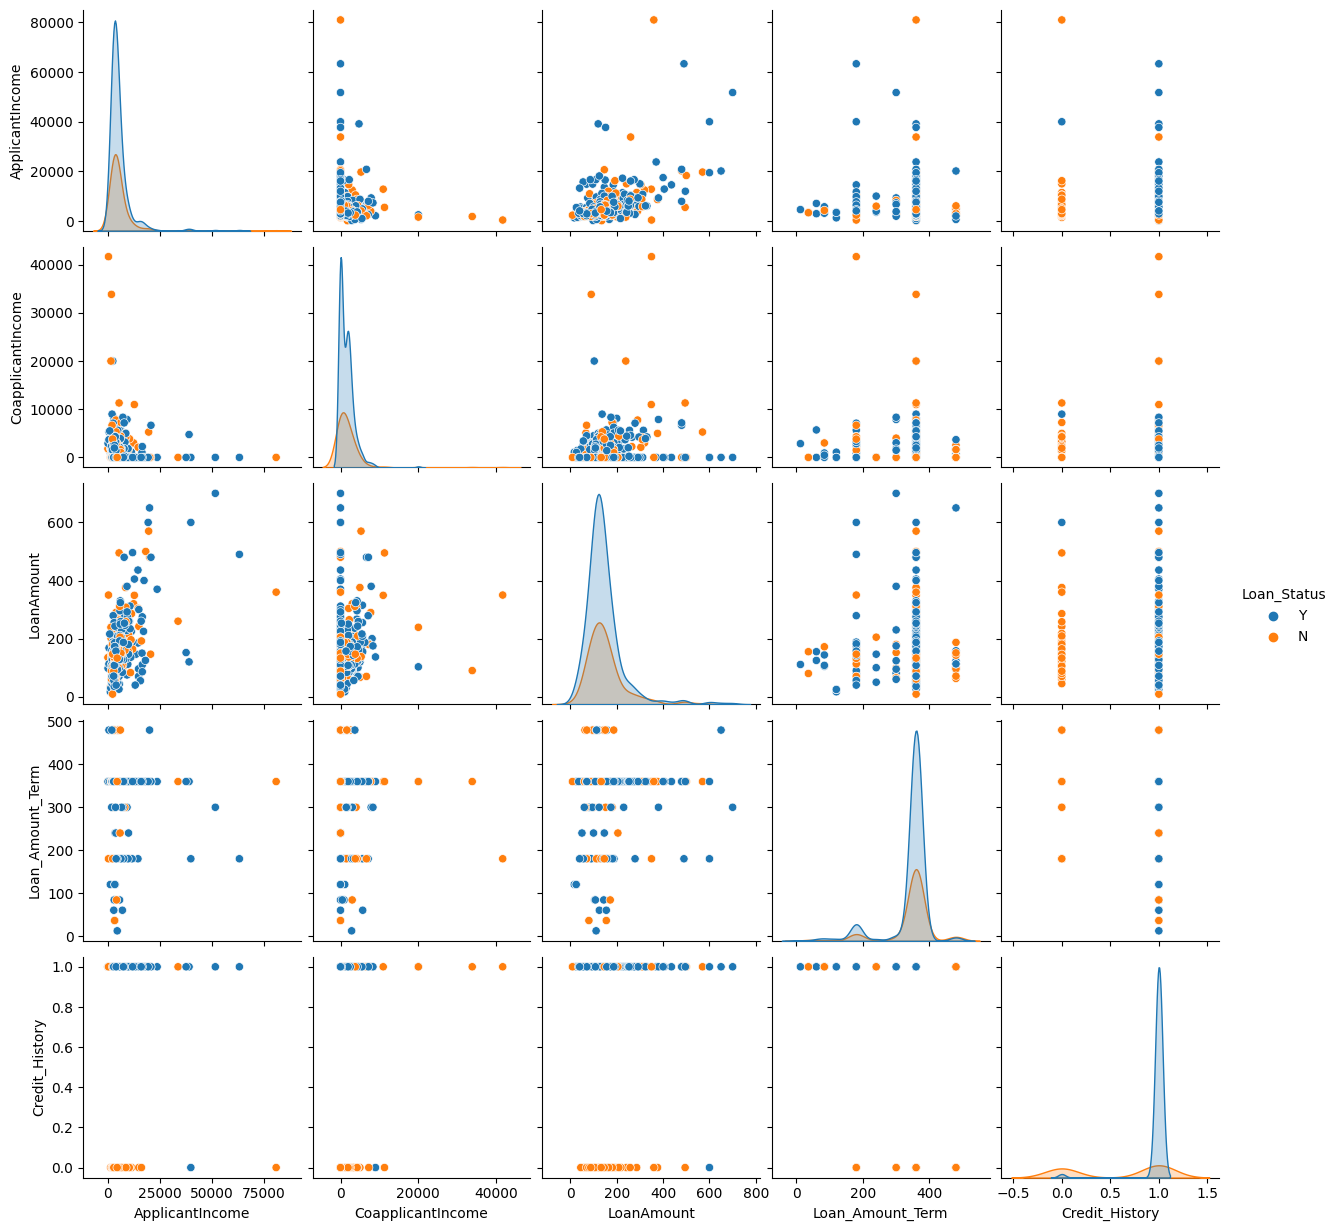

In [ ]:
sns.pairplot(data=df,hue='Loan_Status')
plt.show()

<ipython-input-29-c9c76f06d8f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


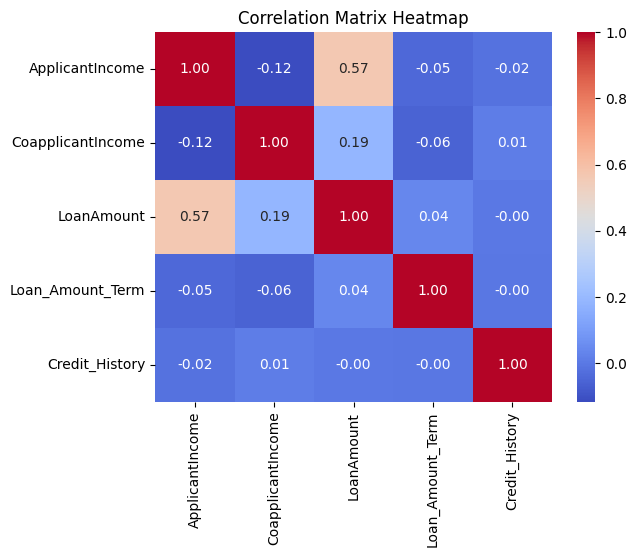

In [ ]:
corr = df.corr()

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

plt.title('Correlation Matrix Heatmap')
plt.show()

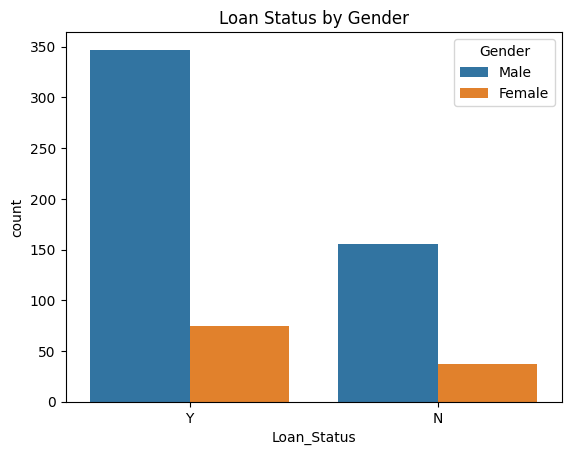

In [ ]:
sns.countplot(x='Loan_Status', hue='Gender', data=df)
plt.title('Loan Status by Gender')
plt.show()

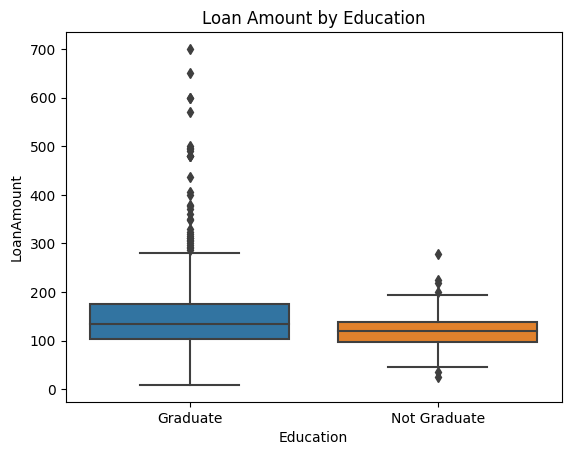

In [ ]:
sns.boxplot(x='Education', y='LoanAmount', data=df)
plt.title('Loan Amount by Education')
plt.show()

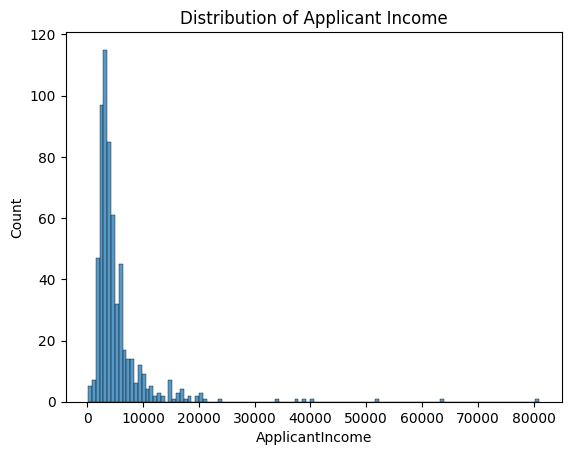

In [ ]:
sns.histplot(x='ApplicantIncome', data=df)
plt.title('Distribution of Applicant Income')
plt.show()

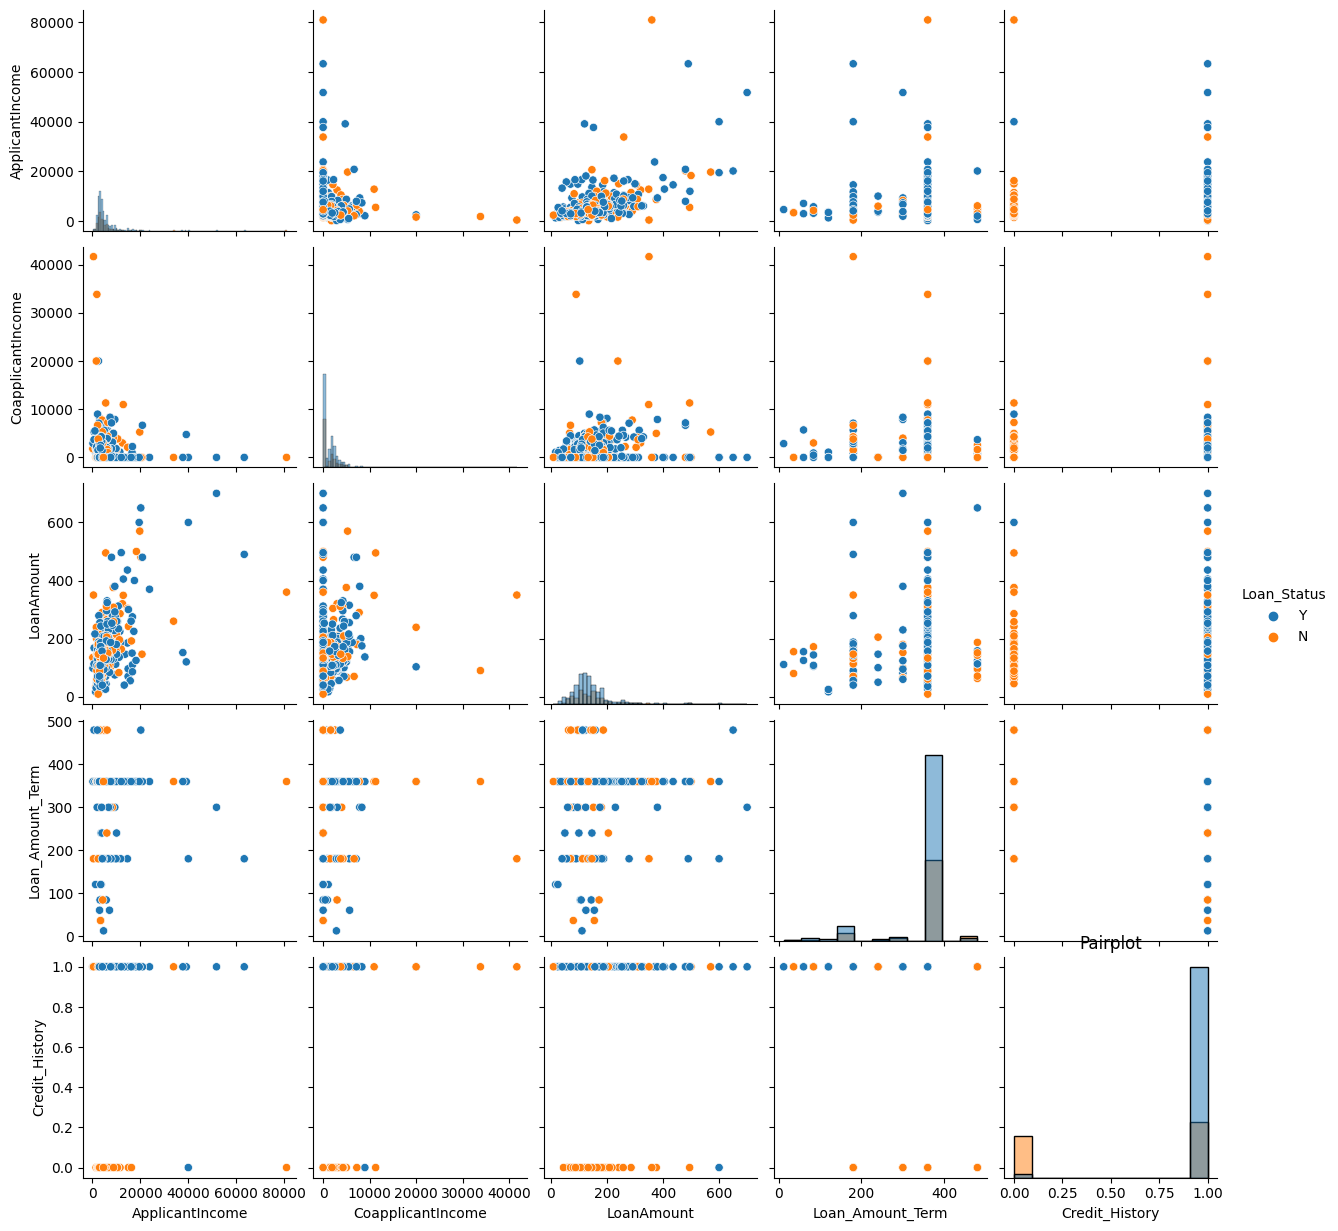

In [ ]:
sns.pairplot(df, hue='Loan_Status', diag_kind='hist')
plt.title('Pairplot')
plt.show()

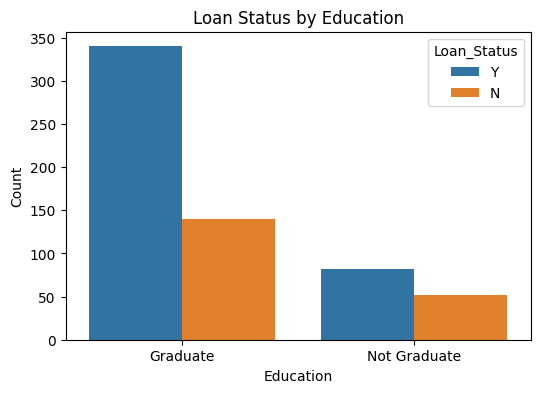

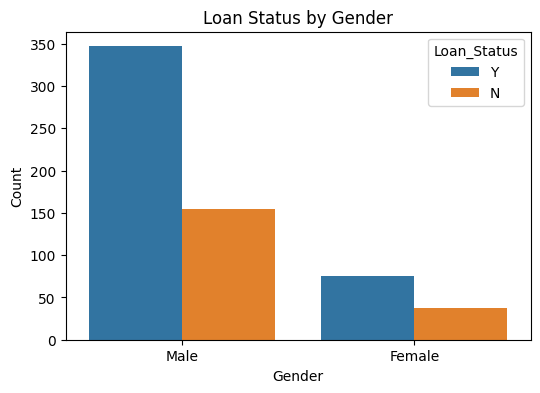

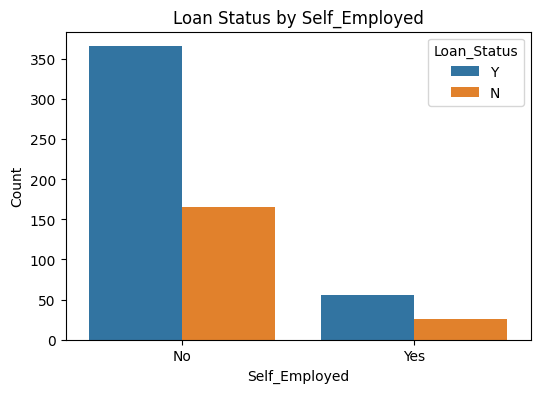

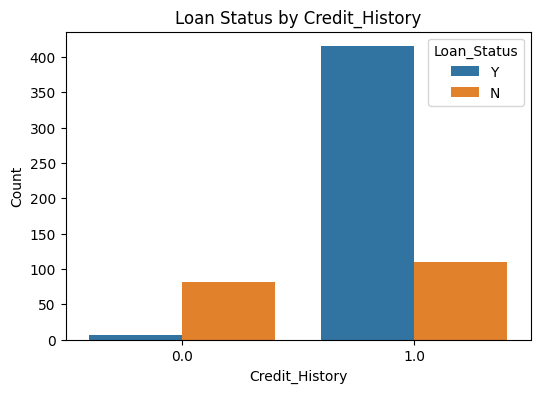

In [ ]:
cols = ['Education', 'Gender', 'Self_Employed', 'Credit_History']
for col in cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Loan_Status', data=df)
    plt.title('Loan Status by {}'.format(col))
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

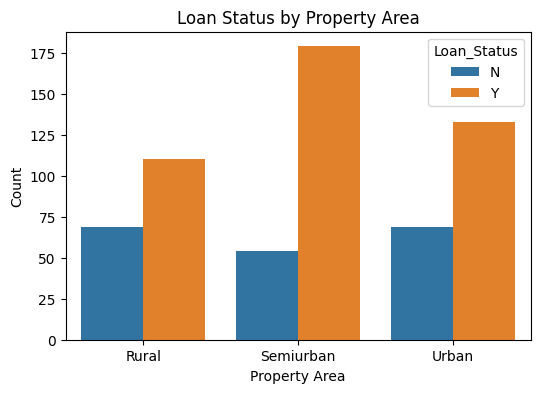

In [ ]:
# group data by Property_Area and Loan_Status
property_loan = df[['Property_Area', 'Loan_Status']].groupby(['Property_Area', 'Loan_Status']).agg(count_loan_status=('Loan_Status','count')).reset_index()

# plot the results
plt.figure(figsize=(6,4))
sns.barplot(x='Property_Area', y='count_loan_status', hue='Loan_Status', data=property_loan)
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()

In [ ]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
def process(df):
  df['Dependents'] = df['Dependents'].replace('3+',3)
  df['Dependents'] = df['Dependents'].astype(int)           #Converting string to int
  
  df['Gender'] = df['Gender'].map({'Male':1,'Female':0})

  df['Married']=df['Married'].map({'Yes':1,'No':0})
  
  df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
    
  df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})

  df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})


  OneHot = pd.get_dummies(df['Property_Area'],prefix="Property_Area",drop_first=True)
  df = df.drop('Property_Area',axis = 1)
  df = df.join(OneHot)

  df.replace({'Y':1,'N':0},inplace=True)

  return df

In [ ]:
prop_area_loan = df[['Property_Area', 'Loan_Status']].groupby(['Property_Area', 'Loan_Status']).agg(count=('Loan_Status', 'count')).reset_index()

In [ ]:
print(df.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


### **Model Building**

Now that we have preprocessed the data and gained some insights from the data, we can start building our classification model.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler

# converting categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# separate features and target variable
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression(solver='liblinear')

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [1000]
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=LR, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

cv_results = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf)

Best parameters:  {'C': 0.001, 'max_iter': 1000, 'penalty': 'l2'}
Best score:  0.8148010719439291


In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.001, max_iter=1000, penalty='l2', solver='liblinear', random_state=42)

LR.fit(X_train, y_train)

LogisticRegression(C=0.001, max_iter=1000, random_state=42, solver='liblinear')

In [ ]:
y_pred = LR.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

[[18 25]
 [ 1 79]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score

RF = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

cv_results = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf)
print("CV results:", cv_results)
print("Mean CV accuracy:", cv_results.mean())

Best parameters:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Best score:  0.8148216862502575
CV results: [0.72727273 0.75510204 0.86734694 0.85714286 0.86734694]
Mean CV accuracy: 0.8148423005565864


In [ ]:
RF = RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_split=10, n_estimators=100)

RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

[[18 25]
 [ 1 79]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

In [ ]:
RF = RandomForestClassifier(n_estimators=250, random_state=250)
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=250, random_state=250)

In [ ]:
y_pred = RF.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123

[[18 25]
 [ 5 75]]


In [ ]:
feature_importance = RF.feature_importances_

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score

DT = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=DT, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

cv_results = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf)
print("CV results:", cv_results)
print("Mean CV accuracy:", cv_results.mean())

Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best score:  0.7964337250051536
CV results: [0.74747475 0.71428571 0.81632653 0.83673469 0.85714286]
Mean CV accuracy: 0.794392908678623


In [ ]:
DT = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=2)

DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred = DT.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.42      0.53        43
           1       0.74      0.91      0.82        80

    accuracy                           0.74       123
   macro avg       0.73      0.67      0.67       123
weighted avg       0.74      0.74      0.72       123

[[18 25]
 [ 7 73]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

KNN = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
}

grid_search = GridSearchCV(KNN, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

cv_results = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
print("CV results:", cv_results)
print("Mean CV accuracy:", cv_results.mean())

kf = KFold(n_splits=5)
kf_results = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf)
print("KF results:", kf_results)
print("Mean KF accuracy:", kf_results.mean())

Best parameters:  {'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'uniform'}
Best score:  0.7983508554937127
CV results: [0.80808081 0.80612245 0.78571429 0.78571429 0.80612245]
Mean CV accuracy: 0.7983508554937127
KF results: [0.76767677 0.83673469 0.78571429 0.78571429 0.80612245]
Mean KF accuracy: 0.7963924963924963


In [ ]:
KNN = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=9, weights='uniform')

KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=9)

In [ ]:
y_pred = KNN.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        43
           1       0.76      1.00      0.86        80

    accuracy                           0.80       123
   macro avg       0.88      0.71      0.73       123
weighted avg       0.85      0.80      0.77       123

[[18 25]
 [ 0 80]]


In [ ]:
import sklearn
print(sklearn.__version__)


!pip install --upgrade scikit-learn


!pip install matplotlib-venn


!apt-get -qq install -y libfluidsynth1


!apt-get -qq install -y graphviz && pip install pydot
import pydot


!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive


!pip install cartopy
import cartopy

1.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
E: Package 'libfluidsynth1' has no installation candidate
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 122518 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Processing triggers for man-db (2.9.1-1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.6 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-p

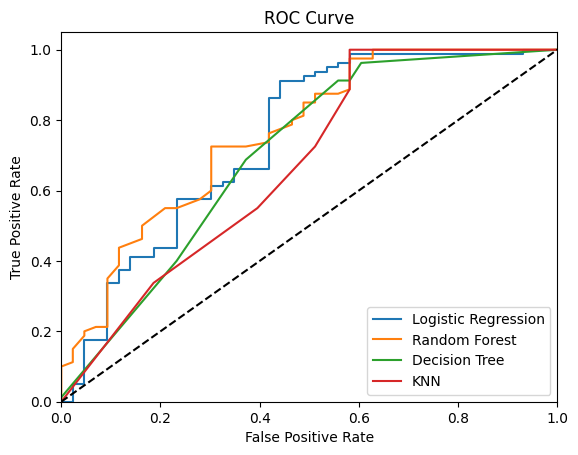

                 Model  Accuracy  F1 Score  Precision  Recall   ROC AUC
0  Logistic Regression  0.788618  0.858696   0.759615  0.9875  0.745058
1        Random Forest  0.756098  0.833333   0.750000  0.9375  0.760465
2        Decision Tree  0.739837  0.820225   0.744898  0.9125  0.703634
3                  KNN  0.796748  0.864865   0.761905  1.0000  0.673256


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

models = [('Logistic Regression', LR), ('Random Forest', RF), ('Decision Tree', DT), ('KNN', KNN)]

results = []

for name, model in models:
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    
    results.append((name, accuracy, f1, precision, recall, roc_auc))
    
    # plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label=name)
    
# plot ROC curve for all models
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# print results as a table
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC'])
print(results_df)

## **Conclusion**

In this project, we explored a dataset of home loan applications and built various classification models to predict whether a loan application will be approved or denied. 

We started by performing exploratory data analysis and preprocessing the data, which involved handling missing values, encoding categorical features, and scaling numerical features.

We then trained several classification models, including Logistic Regression, Random Forest, Decision Tree, and KNN, and evaluated their performance using accuracy, precision, recall, and F1-score metrics. Based on our analysis, the **Random Forest classifier** achieved the highest accuracy and F1-score, making it the best model for this task.

Overall, this project demonstrates the potential of machine learning in the financial industry, and provides insights into the features and models that can be used to predict home loan approval.

With further refinement and optimization, these models can potentially be used by banks and financial institutions to streamline the loan approval process and make more informed lending decisions.




